# part 1

In [2]:
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
G1=nx.watts_strogatz_graph(500, 4, 0)
G2=nx.watts_strogatz_graph(500, 4, 0.1)
G3=nx.watts_strogatz_graph(500, 4, 1)

In [3]:
d1=nx.average_shortest_path_length(G1)
d2=nx.average_shortest_path_length(G2)
d3=nx.average_shortest_path_length(G3)

In [4]:
print(d1,d2,d3)
# avg shortest path length approaches average degree

62.875751503006015 7.819222444889779 4.749234468937876


In [5]:
p_list=[0,0.01,0.03,0.05,0.1,0.2]
dic={}
for p in p_list:
    dic[p] = []
    for i in range(50):
        G=nx.watts_strogatz_graph(500, 4, p)
        dic[p].append(nx.average_shortest_path_length(G))

In [18]:
avg=[sum(i)/len(i) for i in dic.values()]
sd=[np.std(i) for i in dic.values()]

In [21]:
sd

[7.105427357601002e-15,
 4.654824039764733,
 1.3131842766020778,
 0.6161834992457503,
 0.35123550388732744,
 0.11294961839769603]

In [1]:
plt.errorbar(y=avg,x=p_list,yerr=sd,fmt='o''-')
plt.show()

NameError: name 'plt' is not defined

# Part 2

In [138]:
import random
import math

In [139]:
G=nx.Graph()

In [140]:
G.add_nodes_from([0,1])
G.add_edges_from([[0,1],])

In [141]:
for i in range(2,100):
    node=random.choice(np.array(list(G.edges)).flatten())
    G.add_node(i)
    G.add_edge(i,node)

//anaconda3/lib/python3.7/site-packages/networkx/drawing/nx_pylab.py:579: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if not cb.iterable(width):


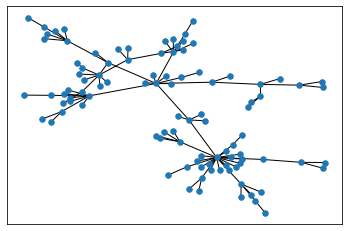

In [142]:
nx.draw_networkx(G,with_labels=False,node_size=30)

In [143]:
#BAG=nx.barabasi_albert_graph(100,1)

In [144]:
#nx.draw_networkx(BAG,with_labels=False,node_size=30)

In [145]:
for i in range(100,5000):
    node=random.choice(np.array(list(G.edges)).flatten())
    G.add_node(i)
    G.add_edge(i,node)

In [146]:
len(G.nodes)

5000

In [147]:
sorting=sorted(list(G.degree()),key=lambda x : x[1],reverse=True)
print(sorting[0][1])
print(sorting[-1][1])

142
1


In [148]:
his=np.histogram([x[1] for x in list(G.degree)])

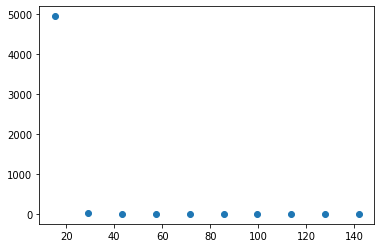

In [149]:
plt.scatter(y=his[0],x=his[1][1:])
plt.show()

In [150]:
def log(x):
    if x<=0:
        return 0
    return math.log(x)

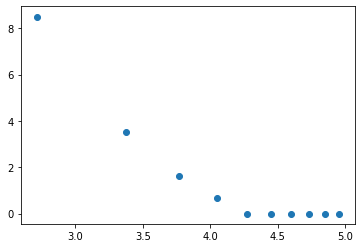

In [151]:
plt.scatter(y=[log(x) for x in his[0]],x=[log(i) for i in his[1][1:]])
plt.show()

In [152]:
node_random=random.choice(list(G.nodes))
print("node is " + str(node_random))
G.degree(node_random)

node is 2273


2

In [153]:
list(G.neighbors(n=362))

[234, 972, 1223]

In [154]:
G.degree(80)

9

In [155]:
# true

In [156]:
count_true=0
count_false=0
for i in range(1000):
    node_random=random.choice(list(G.nodes))
    num1=G.degree(node_random)
    total=0
    count=0
    for neighbor in G.neighbors(n=node_random):
        count+=1
        total+=G.degree(neighbor)
    if total/count > num1:
        count_true+=1
    else:
        count_false+=1
print(count_true)
print(count_false)

855
145


In [157]:
G2=nx.Graph()
G2.add_nodes_from([0,1])
G2.add_edges_from([[0,1],])
for i in range(2,5000):
    node=random.choice(list(G2.nodes))
    G2.add_node(i)
    G2.add_edge(i,node)

In [158]:
G3=nx.gnm_random_graph(n=len(list(G2.nodes)),m=len(list(G2.edges)))

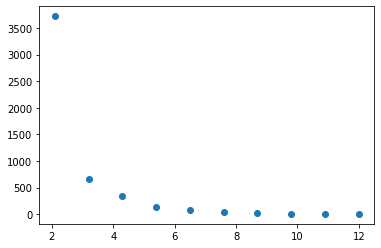

In [164]:
G2_his=np.histogram(list(map(lambda x : x[1], list(G2.degree))))
plt.scatter(y=G2_his[0],x=G2_his[1][1:])
plt.show()

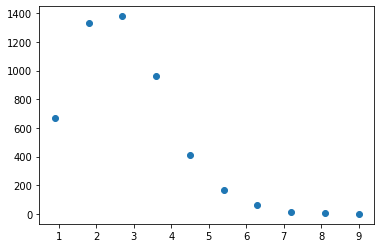

In [165]:
G3_his=np.histogram(list(map(lambda x : x[1], list(G3.degree))))
plt.scatter(y=G3_his[0],x=G3_his[1][1:])
plt.show()

In [166]:
nx.number_connected_components(G2)

1

In [167]:
nx.number_connected_components(G3)

798